## Select GPU number

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [2]:
from deepocr.apis import init_recognizer, inference_recognizer
from deepocr.datasets import build_converter

import mmcv
from mmcv.visualization import color_val

import numpy as np
import cv2
import random
import matplotlib.pyplot as plt

In [3]:
def imshow(img, color_type='color', fig_size=(8, 8)):
    """Draw the image.

    Args:
        img (str or ndarray): The image to be displayed.
    """
    plt.figure(figsize=fig_size)
    plt.imshow(mmcv.imread(img, flag=color_type))

### Provide Config file and Checkpoint for the pretrained model

In [4]:
# config file and ckpt file
config_file = './kocr_recognizer/work_dir/kocr/kocr_vgg7_lstm_attention_bidecoder/kocr_vgg7_lstm_attention_bidecoder.py'
checkpoint_file = './kocr_recognizer/work_dir/kocr/kocr_vgg7_lstm_attention_bidecoder/epoch_5.pth'

### Initialize the model with the pretrained checkpoint file

In [5]:
# build the model from a config file and a checkpoint file
model = init_recognizer(config_file, checkpoint_file, device='cuda:0')

### Test file

In [6]:
# test a single image
img = './sample.jpg'

In [7]:
%%time
result = inference_recognizer(model, img, color_type='grayscale')

CPU times: user 286 ms, sys: 119 ms, total: 404 ms
Wall time: 396 ms


## Decode the result with the converter

In [8]:
converter = build_converter(model.cfg.data.test.converter)
result_str = converter.decode(result, remove_eos=True, eos_index=1)[0]

In [9]:
result_str

'등록번호:59358835'

## Show the result with the img file

등록번호:59358835


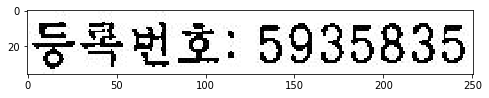

In [11]:
imshow(img)
print(result_str)